# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import optuna                               #Optuna for Hyperparameter Tuning
%matplotlib inline
sns.set_palette('deep')
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
import xgboost as xgb
from sklearn.model_selection import KFold   #KFold for splitting dataset
from sklearn.metrics import accuracy_score  #To check accuracy score
filterwarnings('ignore')
import time

# Reading Train Data

In [2]:
train=pd.read_csv('Train_Dataset.csv')

## Checking Basic Info of Training Data

In [3]:
train.shape

(7810, 22)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [5]:
train.isna().sum()

EmployeeID            2630
Attrition             2630
Age                   2946
TravelProfile         2630
Department            2754
HomeToWork            2885
EducationField        2630
Gender                2676
HourlnWeek            2917
Involvement           2630
WorkLifeBalance       2630
Designation           2668
JobSatisfaction       2630
ESOPs                 2630
NumCompaniesWorked    2630
OverTime              2630
SalaryHikelastYear    2799
WorkExperience        2817
LastPromotion         2700
CurrentProfile        2941
MaritalStatus         2630
MonthlyIncome         2723
dtype: int64

In [6]:
train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,...,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,...,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,...,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,...,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,...,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [7]:
train.tail()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Removing records where all the fiels are Null

In [8]:
train=train.dropna(how='all')

In [9]:
train.shape

(5180, 22)

## Checking and replacing values

In [10]:
train['Gender'].value_counts()

Male      3094
Female    1338
F          702
Name: Gender, dtype: int64

In [11]:
train['Gender']=train['Gender'].replace(to_replace='F',value='Female')

In [12]:
train['Gender'].value_counts()

Male      3094
Female    2040
Name: Gender, dtype: int64

In [13]:
train['MaritalStatus'].value_counts()

Single      1776
Married     1614
Divorsed    1016
M            774
Name: MaritalStatus, dtype: int64

In [14]:
train['MaritalStatus']=train['MaritalStatus'].replace(to_replace='M',value='Married')

In [15]:
train['MaritalStatus'].value_counts()

Married     2388
Single      1776
Divorsed    1016
Name: MaritalStatus, dtype: int64

# Outliers Treatment

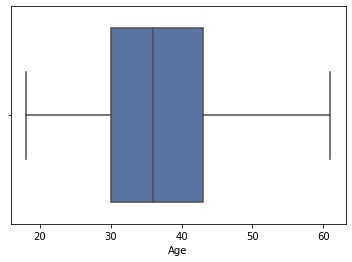

In [16]:
sns.boxplot(train['Age']);

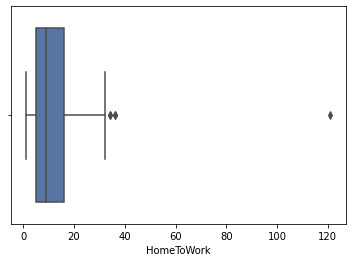

In [17]:
sns.boxplot(train['HomeToWork']);

In [18]:
train[train['HomeToWork']>110] #Record where HomeToWork is an outlier

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
782,5110783.0,0.0,52.0,No,Sales,121.0,Statistics,Male,40.0,3.0,...,1.0,1.0,2.0,0.0,20.0,16.0,0.0,0.0,Married,18482.0


In [19]:
train.drop(782,inplace=True) #Dropping HomeToWork Outlier

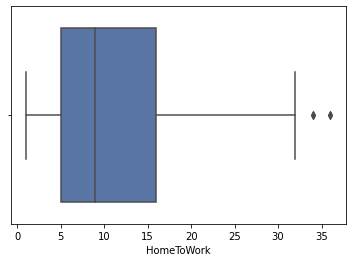

In [20]:
sns.boxplot(train['HomeToWork']);

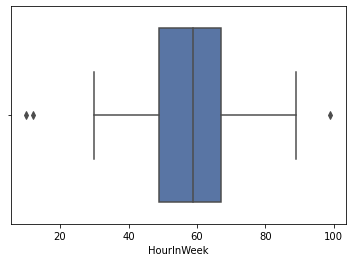

In [21]:
sns.boxplot(train['HourlnWeek']);

In [22]:
#Records where HourInWeek is outlier
train[(train['HourlnWeek']>90)|(train['HourlnWeek']<20)] 

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
1157,5111158.0,0.0,41.0,Rarely,Analytics,22.0,CA,Male,12.0,3.0,...,1.0,1.0,9.0,1.0,21.0,16.0,4.0,NaN,Married,18741.0
1404,5111405.0,0.0,59.0,Rarely,Sales,26.0,Statistics,Female,99.0,3.0,...,5.0,1.0,7.0,0.0,16.0,28.0,7.0,9.0,Single,22637.0
4351,5114352.0,0.0,40.0,Rarely,Analytics,NaN,CA,Male,10.0,3.0,...,1.0,0.0,8.0,1.0,20.0,15.0,3.0,7.0,Married,17741.0


In [23]:
#Dropping HourInWeek outliers
train.drop([1157,1404,4351],inplace=True)

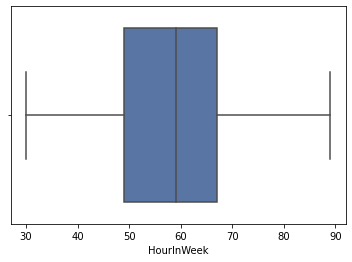

In [24]:
sns.boxplot(train['HourlnWeek']);

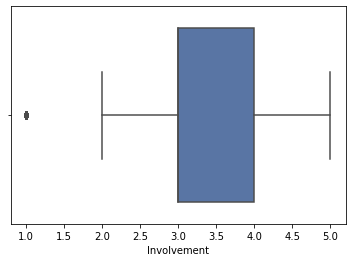

In [25]:
sns.boxplot(train['Involvement']);

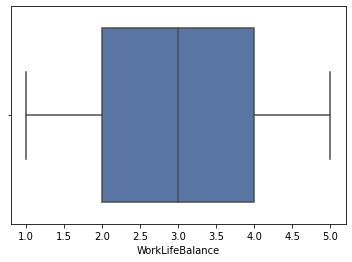

In [26]:
sns.boxplot(train['WorkLifeBalance']);

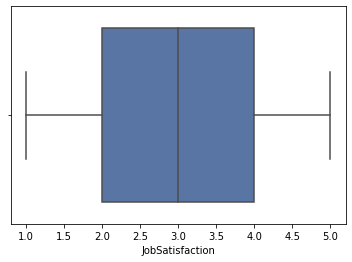

In [27]:
sns.boxplot(train['JobSatisfaction']);

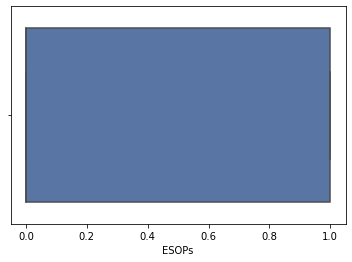

In [28]:
sns.boxplot(train['ESOPs']);

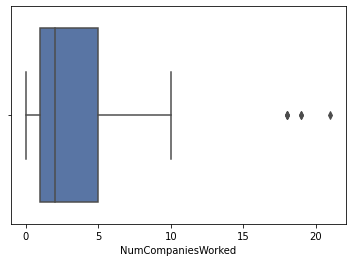

In [29]:
sns.boxplot(train['NumCompaniesWorked']);

In [30]:
#Taking only those records where NumCompaniesWorked is less than 10
train=train[train['NumCompaniesWorked']<=10]

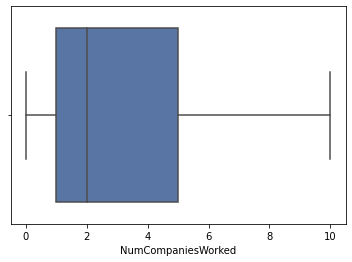

In [31]:
sns.boxplot(train['NumCompaniesWorked']);

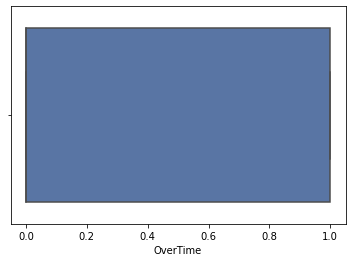

In [32]:
sns.boxplot(train['OverTime']);

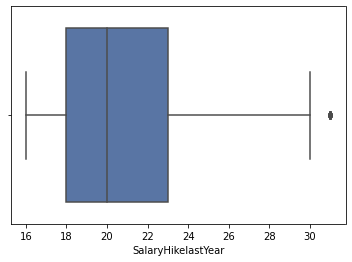

In [33]:
sns.boxplot(train['SalaryHikelastYear']);

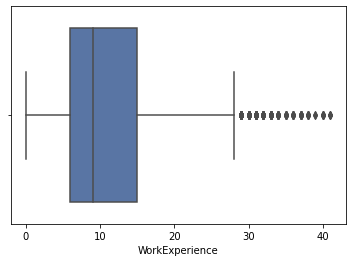

In [34]:
sns.boxplot(train['WorkExperience']);

In [35]:
# Taking only those records where WorkExperience is less than 32
train=train[train['WorkExperience']<=32]

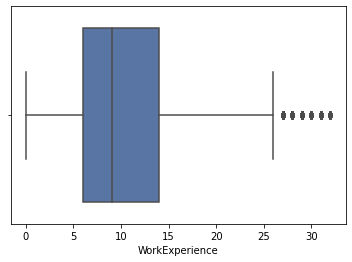

In [36]:
sns.boxplot(train['WorkExperience']);

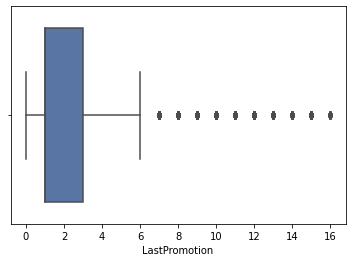

In [37]:
sns.boxplot(train['LastPromotion']);

In [38]:
# Takinly only those records where LastPromotion is less than 8
train=train[train['LastPromotion']<=8]

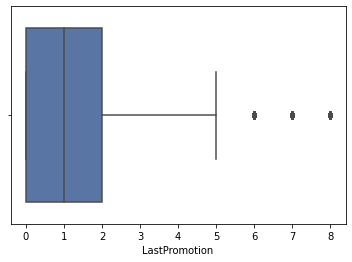

In [39]:
sns.boxplot(train['LastPromotion']);

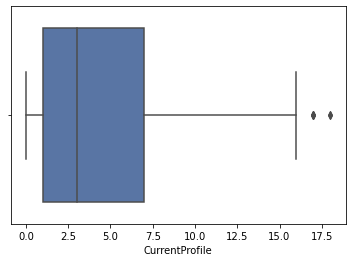

In [40]:
sns.boxplot(train['CurrentProfile']);

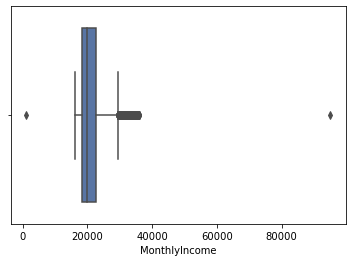

In [41]:
sns.boxplot(train['MonthlyIncome']);

In [42]:
# Taking only those records where MonthlyIncome is less than 5000 and more than 80000
train[(train['MonthlyIncome']>80000) | (train['MonthlyIncome']<5000)]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,...,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
1528,5111529.0,0.0,36.0,Rarely,Analytics,6.0,Statistics,Female,52.0,4.0,...,5.0,1.0,9.0,1.0,19.0,6.0,0.0,0.0,Divorsed,95000.0
4781,5114782.0,0.0,38.0,Rarely,Analytics,4.0,Engineer,Female,32.0,3.0,...,3.0,0.0,3.0,1.0,25.0,19.0,2.0,2.0,Single,1000.0


In [43]:
train.drop([1528,4781],inplace=True)

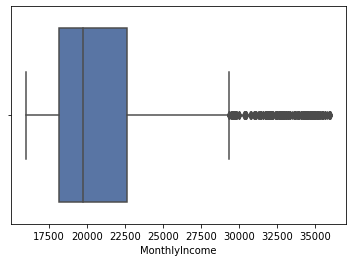

In [44]:
sns.boxplot(train['MonthlyIncome']);

In [45]:
train.shape

(4527, 22)

In [46]:
df=train

# HEAT MAP 

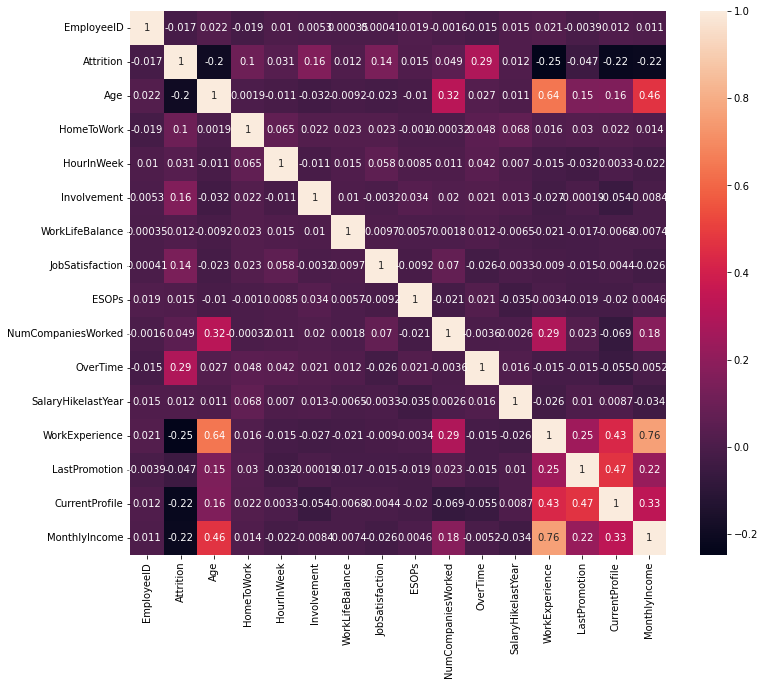

In [47]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True);

# AGE Impute

In [48]:
df['Age'].describe()

count    4217.000000
mean       36.398625
std         9.082859
min        18.000000
25%        30.000000
50%        35.000000
75%        42.000000
max        61.000000
Name: Age, dtype: float64

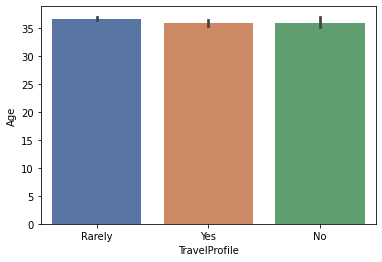

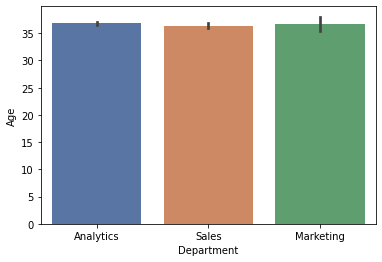

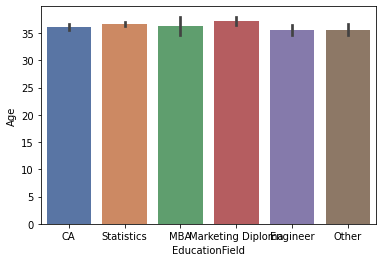

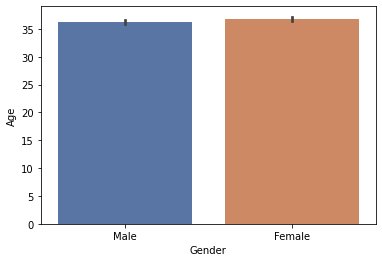

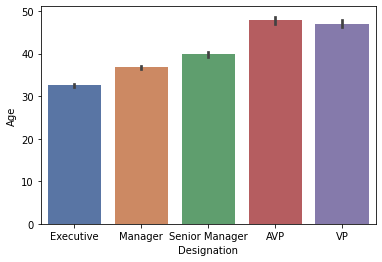

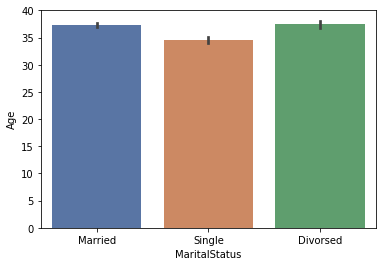

In [49]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='Age',x=col)

### We are imputing Age ACCORDING TO DESIGNATIONS

In [50]:
df.groupby('Designation').median()['Age']

Designation
AVP               48.0
Executive         31.0
Manager           36.0
Senior Manager    38.0
VP                46.0
Name: Age, dtype: float64

In [51]:
def fill_age(Designation,Age):
    if pd.isna(Age):
        if Designation=='AVP':
            ab=48
        elif Designation=='Executive':
            ab=31
        elif Designation=='Manager':
            ab=36
        elif Designation=='Senior Manager':
            ab=38
        elif Designation=='VP':
            ab=46
    else:
        ab=Age
    return ab

In [52]:
df['Age']=df.apply(lambda x: fill_age(x['Designation'], x['Age']), axis=1)

In [53]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department            122
HomeToWork            249
EducationField          0
Gender                 39
HourlnWeek            278
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    160
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# Department Impute

In [54]:
df['Department'].isna().sum()

122

In [55]:
df['Department'].describe()

count          4405
unique            3
top       Analytics
freq           2838
Name: Department, dtype: object

### We are imputing Department with Mode -Analytics since 2% of Data is missing

In [56]:
df['Department']=df['Department'].fillna(value='Analytics')

In [57]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork            249
EducationField          0
Gender                 39
HourlnWeek            278
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    160
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# HomeToWork Impute

In [58]:
df['HomeToWork'].describe()

count    4278.000000
mean       11.043712
std         8.231977
min         1.000000
25%         5.000000
50%         9.000000
75%        16.000000
max        36.000000
Name: HomeToWork, dtype: float64

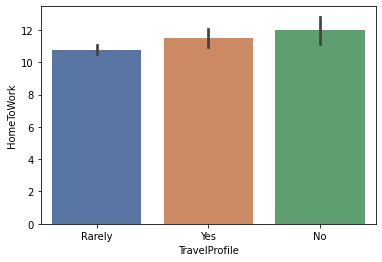

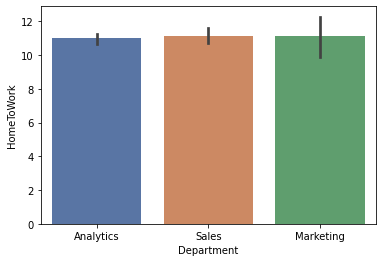

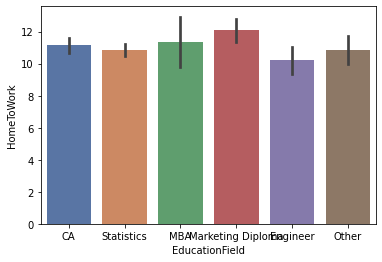

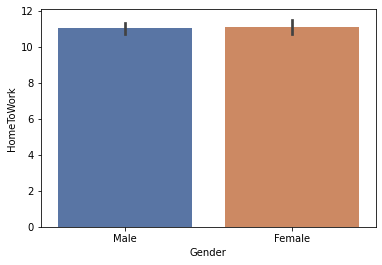

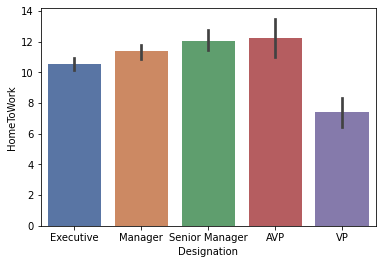

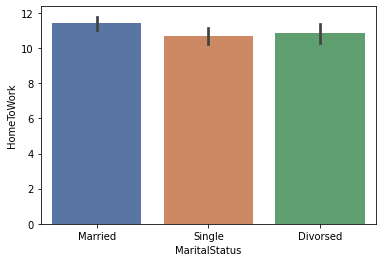

In [59]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='HomeToWork',x=col)

### Impute HomeToWork with Median

In [60]:
df['HomeToWork']=df['HomeToWork'].fillna(value=df['HomeToWork'].median())

In [61]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                 39
HourlnWeek            278
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    160
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# Gender Impute

In [62]:
df['Gender'].describe()

count     4488
unique       2
top       Male
freq      2714
Name: Gender, dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

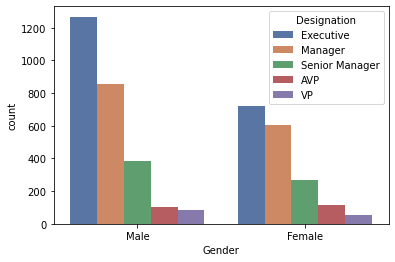

In [63]:
sns.countplot(data=df,x='Gender',hue='Designation')

<AxesSubplot:xlabel='Gender', ylabel='count'>

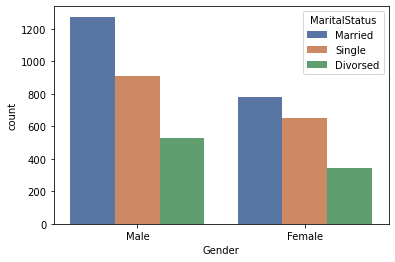

In [64]:
sns.countplot(data=df,x='Gender',hue='MaritalStatus')

<AxesSubplot:xlabel='Gender', ylabel='count'>

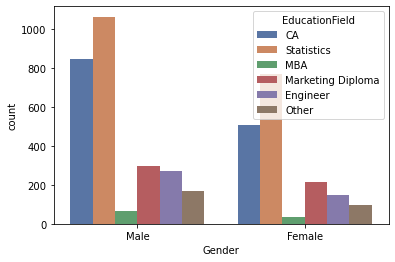

In [65]:
sns.countplot(data=df,x='Gender',hue='EducationField')

### We are imputing Gender with Male as the gender is equally distributed along different verticles and maximum frequency is for Male

In [66]:
df['Gender']=df['Gender'].fillna(value='Male')

In [67]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek            278
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    160
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# HourInWeek Impute

In [68]:
df['HourlnWeek'].describe()

count    4249.000000
mean       58.039303
std        12.932976
min        30.000000
25%        49.000000
50%        59.000000
75%        67.000000
max        89.000000
Name: HourlnWeek, dtype: float64

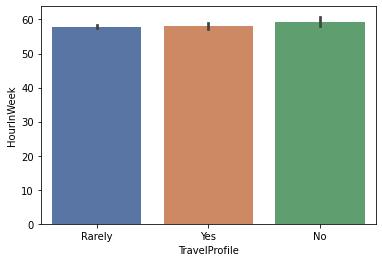

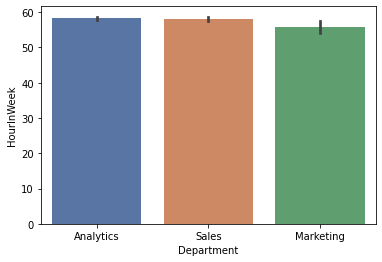

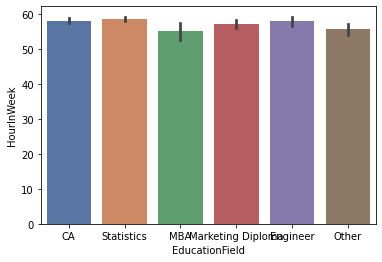

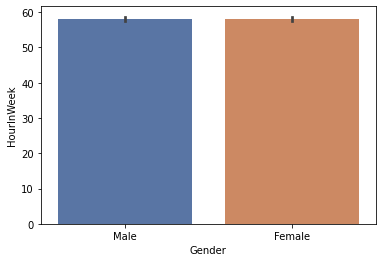

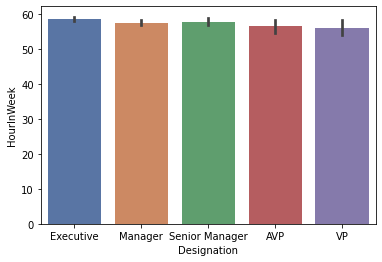

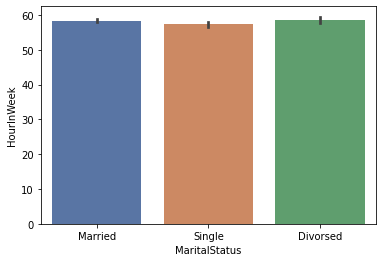

In [69]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='HourlnWeek',x=col)

### Imputing HourInWeek with Mean value

In [70]:
df['HourlnWeek']=df['HourlnWeek'].fillna(value=df['HourlnWeek'].mean())

In [71]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    160
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# Designation Impute

In [72]:
df['Designation'].describe()

count          4489
unique            5
top       Executive
freq           2025
Name: Designation, dtype: object

<AxesSubplot:xlabel='Designation', ylabel='count'>

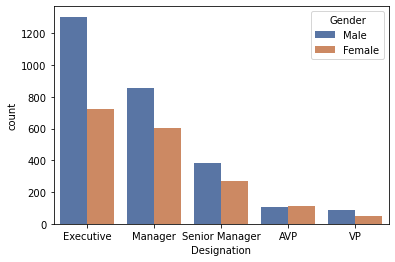

In [73]:
sns.countplot(data=df,x='Designation',hue='Gender')

<AxesSubplot:xlabel='Designation', ylabel='count'>

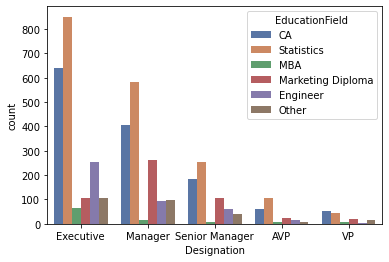

In [74]:
sns.countplot(data=df,x='Designation',hue='EducationField')

<AxesSubplot:xlabel='Designation', ylabel='count'>

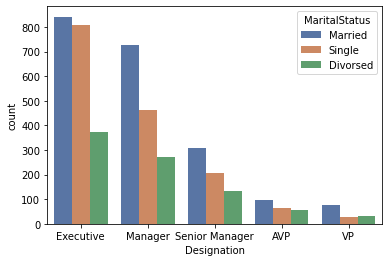

In [75]:
sns.countplot(data=df,x='Designation',hue='MaritalStatus')

### Imputing Designation with mode of Designation 

In [76]:
df['Designation']=df['Designation'].fillna(value='Executive')

In [77]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    160
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# SalaryHikeLastYear Impute

In [78]:
df['SalaryHikelastYear'].describe()

count    4367.000000
mean       20.645523
std         3.654491
min        16.000000
25%        18.000000
50%        20.000000
75%        23.000000
max        31.000000
Name: SalaryHikelastYear, dtype: float64

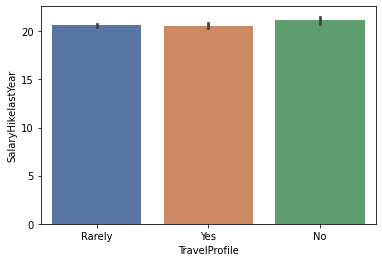

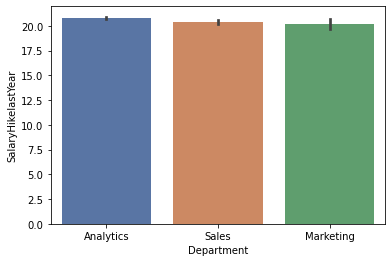

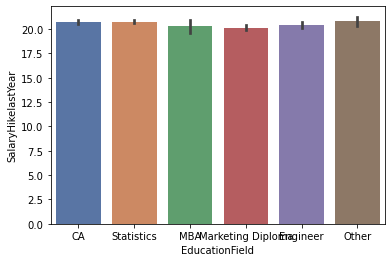

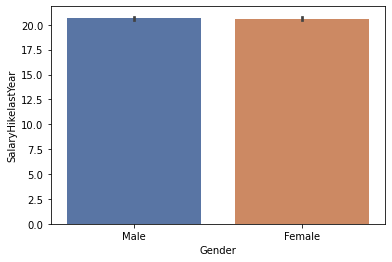

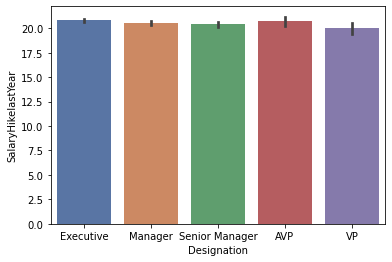

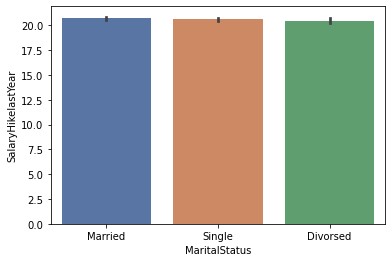

In [79]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='SalaryHikelastYear',x=col)

### Imputing SalaryHikeLastYear with mean

In [80]:
df['SalaryHikelastYear']=df['SalaryHikelastYear'].fillna(value=df['SalaryHikelastYear'].mean())

In [81]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear      0
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# WorkExperience Impute

In [82]:
df['WorkExperience'].describe()

count    4527.000000
mean       10.094323
std         6.740908
min         0.000000
25%         6.000000
50%         9.000000
75%        13.000000
max        32.000000
Name: WorkExperience, dtype: float64

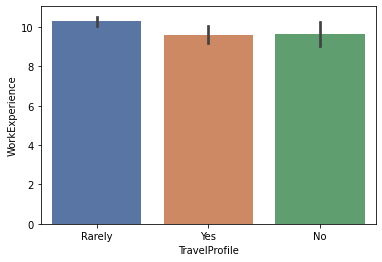

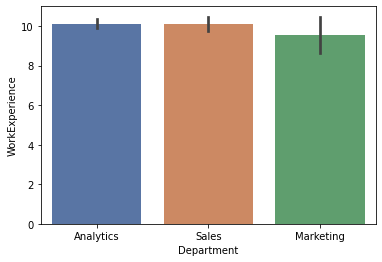

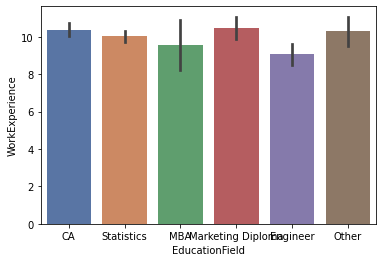

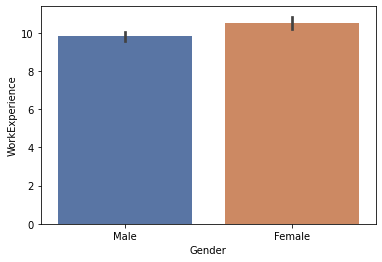

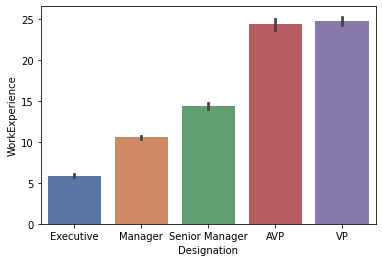

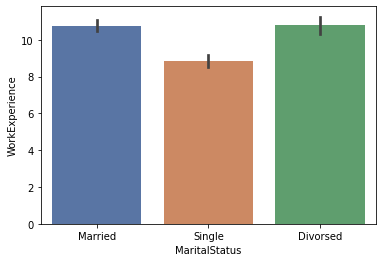

In [83]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='WorkExperience',x=col)

In [84]:
df.groupby('Designation').median()['WorkExperience']

Designation
AVP               25.0
Executive          6.0
Manager           10.0
Senior Manager    13.0
VP                24.0
Name: WorkExperience, dtype: float64

In [85]:
def fill_workexperience(Designation,WorkExperience):
    if pd.isna(WorkExperience):
        if Designation=='AVP':
            ab=25.0
        elif Designation=='Executive':
            ab=6.0
        elif Designation=='Manager':
            ab=10.0
        elif Designation=='Senior Manager':
            ab=14.0
        elif Designation=='VP':
            ab=25.0
    else:
        ab=WorkExperience
    return ab

In [86]:
df['WorkExperience']=df.apply(lambda x: fill_workexperience(x['Designation'], x['WorkExperience']), axis=1)

In [87]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear      0
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# LastPromotion Impute

In [88]:
df['LastPromotion'].describe()

count    4527.000000
mean        1.888889
std         2.073394
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: LastPromotion, dtype: float64

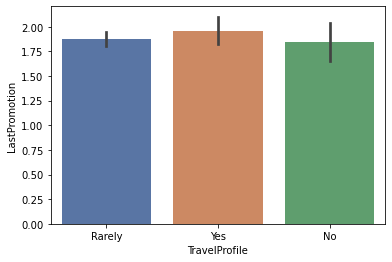

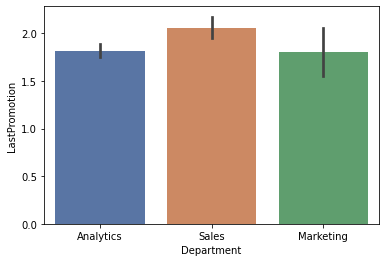

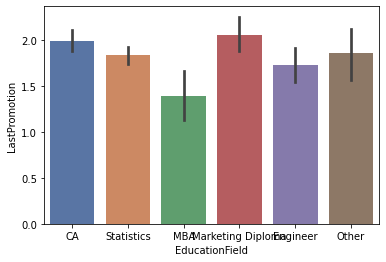

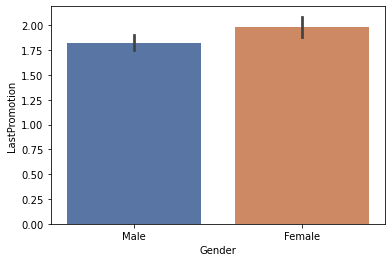

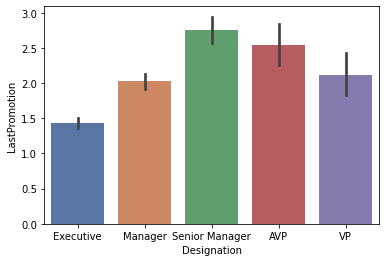

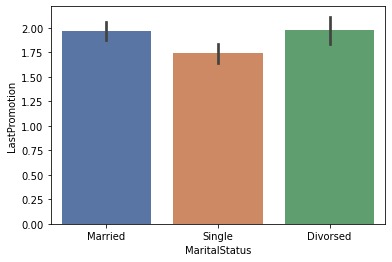

In [89]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='LastPromotion',x=col)

In [90]:
df.groupby('Designation').median()['LastPromotion']

Designation
AVP               2.0
Executive         1.0
Manager           1.0
Senior Manager    2.0
VP                2.0
Name: LastPromotion, dtype: float64

In [91]:
def fill_lastpromotion(Designation,LastPromotion):
    if pd.isna(LastPromotion):
        if Designation=='AVP':
            ab=2.0
        elif Designation=='Executive':
            ab=1.0
        elif Designation=='Manager':
            ab=1.0
        elif Designation=='Senior Manager':
            ab=2.0
        elif Designation=='VP':
            ab=2.0
    else:
        ab=LastPromotion
    return ab

In [92]:
df['LastPromotion']=df.apply(lambda x: fill_lastpromotion(x['Designation'], x['LastPromotion']), axis=1)

In [93]:
df.isna().sum()

EmployeeID              0
Attrition               0
Age                     0
TravelProfile           0
Department              0
HomeToWork              0
EducationField          0
Gender                  0
HourlnWeek              0
Involvement             0
WorkLifeBalance         0
Designation             0
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear      0
WorkExperience          0
LastPromotion           0
CurrentProfile        302
MaritalStatus           0
MonthlyIncome          86
dtype: int64

# CurrentProfile Impute

In [94]:
df['CurrentProfile'].describe()

count    4225.000000
mean        3.960947
std         3.348187
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        18.000000
Name: CurrentProfile, dtype: float64

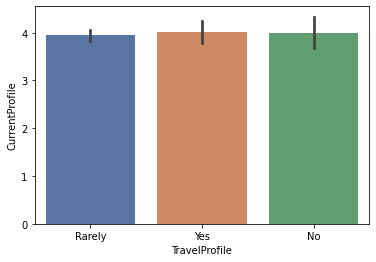

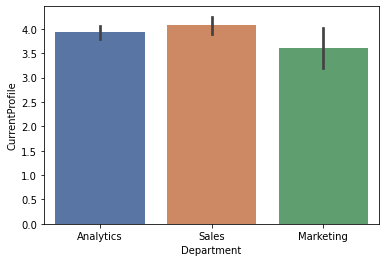

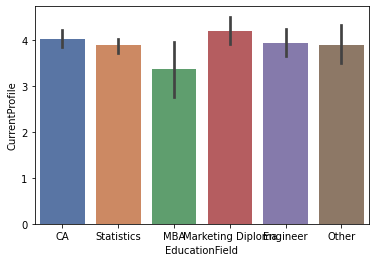

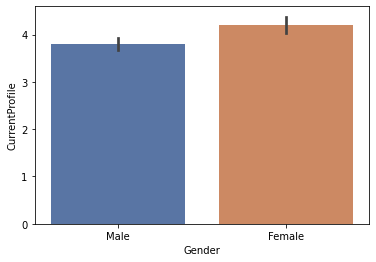

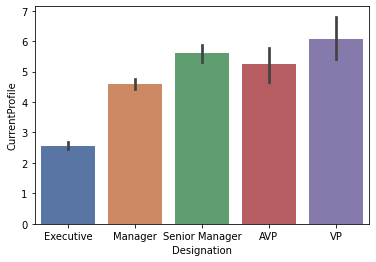

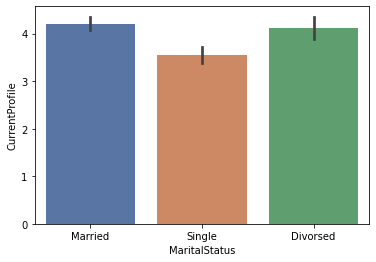

In [95]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='CurrentProfile',x=col)

In [96]:
df.groupby('Designation').median()['CurrentProfile']

Designation
AVP               4.0
Executive         2.0
Manager           4.0
Senior Manager    7.0
VP                6.0
Name: CurrentProfile, dtype: float64

In [97]:
def fill_currentprofile(Designation,CurrentProfile):
    if pd.isna(CurrentProfile):
        if Designation=='AVP':
            ab=7.0
        elif Designation=='Executive':
            ab=2.0
        elif Designation=='Manager':
            ab=4.0
        elif Designation=='Senior Manager':
            ab=7.0
        elif Designation=='VP':
            ab=8.0
    else:
        ab=CurrentProfile
    return ab

In [98]:
df['CurrentProfile']=df.apply(lambda x: fill_currentprofile(x['Designation'], x['CurrentProfile']), axis=1)

In [99]:
df.isna().sum()

EmployeeID             0
Attrition              0
Age                    0
TravelProfile          0
Department             0
HomeToWork             0
EducationField         0
Gender                 0
HourlnWeek             0
Involvement            0
WorkLifeBalance        0
Designation            0
JobSatisfaction        0
ESOPs                  0
NumCompaniesWorked     0
OverTime               0
SalaryHikelastYear     0
WorkExperience         0
LastPromotion          0
CurrentProfile         0
MaritalStatus          0
MonthlyIncome         86
dtype: int64

# MonthlyIncome Impute

In [100]:
df['MonthlyIncome'].describe()

count     4441.000000
mean     21198.410943
std       4316.496348
min      16009.000000
25%      18211.000000
50%      19723.000000
75%      22655.000000
max      35973.000000
Name: MonthlyIncome, dtype: float64

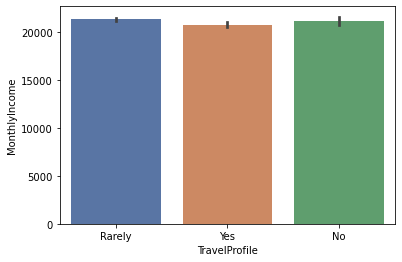

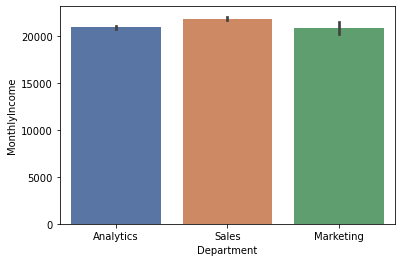

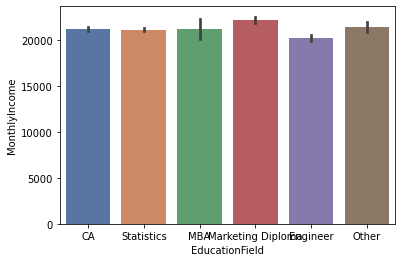

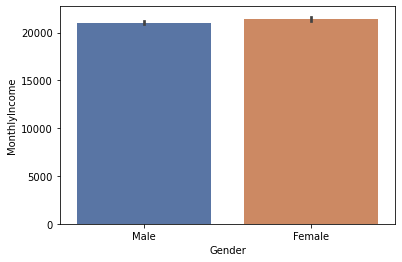

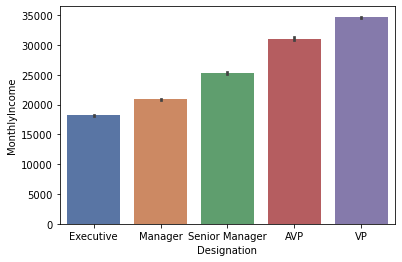

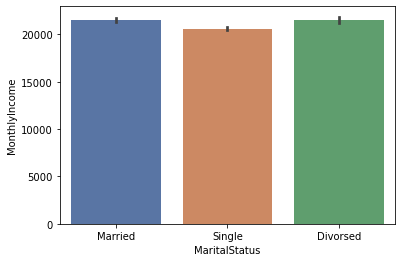

In [101]:
for col in df.select_dtypes(include='object').columns:
    plt.figure()
    sns.barplot(data=df,y='MonthlyIncome',x=col)

In [102]:
df.groupby('Designation').mean()['MonthlyIncome']

Designation
AVP               31012.966981
Executive         18158.685828
Manager           20922.706006
Senior Manager    25281.491446
VP                34601.852941
Name: MonthlyIncome, dtype: float64

In [103]:
df.groupby('Designation').median()['MonthlyIncome']

Designation
AVP               31429.5
Executive         18140.0
Manager           20528.5
Senior Manager    25221.0
VP                34561.5
Name: MonthlyIncome, dtype: float64

<AxesSubplot:xlabel='MonthlyIncome'>

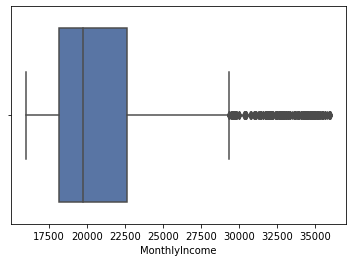

In [104]:
sns.boxplot(df['MonthlyIncome'])

In [105]:
def fill_currentmi(Designation,MonthlyIncome):
    if pd.isna(MonthlyIncome):
        if Designation=='AVP':
            ab=31307.0
        elif Designation=='Executive':
            ab=18145.0
        elif Designation=='Manager':
            ab=20765.0
        elif Designation=='Senior Manager':
            ab=25333.0
        elif Designation=='VP':
            ab=34609.5
    else:
        ab=MonthlyIncome
    return ab

In [106]:
df['MonthlyIncome']=df.apply(lambda x: fill_currentmi(x['Designation'], x['MonthlyIncome']), axis=1)

In [107]:
df.isna().sum()

EmployeeID            0
Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [108]:
df=pd.get_dummies(df,drop_first=True)

In [109]:
df.head()

,EmployeeID,Attrition,Age,HomeToWork,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,...,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Gender_Male,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP,MaritalStatus_Married,MaritalStatus_Single
0,5110001.0,0.0,35.0,5.0,69.0,1.0,1.0,1.0,1.0,1.0,...,0,0,0,1,1,0,0,0,1,0
1,5110002.0,1.0,32.0,5.0,62.0,4.0,3.0,2.0,0.0,8.0,...,0,0,1,0,1,0,0,0,0,1
2,5110003.0,0.0,31.0,5.0,45.0,5.0,3.0,2.0,1.0,3.0,...,0,0,1,0,0,1,0,0,0,1
3,5110004.0,0.0,34.0,10.0,32.0,3.0,2.0,4.0,1.0,1.0,...,0,0,1,0,0,1,0,0,0,0
4,5110005.0,0.0,37.0,27.0,49.0,3.0,4.0,4.0,1.0,8.0,...,0,0,1,0,0,1,0,0,0,0
